### Github üzerinden trafik işaretlerini indirme

> `!` ile başlayan komutlar terminal (bash) komutları olarak işlenir.


In [0]:
# Veri tanımlaması (! işareti komut girmek için kullanılır.)
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


### İndirildiği dizini bulma

> `!ls` dizinleri gösterme komutudur. (linux)

In [0]:
# Komut işlemleri
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


# Trafik İşaretlerini Bulma Uygulaması

Github üzerinden çekilen ve önceden işleme sokulmuş verilerle model oluşturma ve öğretme

In [0]:
# Gerekli Python Kütüphanleri
import numpy as np
import matplotlib.pyplot as plt

# Deep Learning Kütüphaneleri
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

# İndirelen verileri işlemek için (.p)
import pickle

# Veri analizi için gerekli olan kütüphane
import pandas as pd

# Random için gerekli kütüphane
import random

Using TensorFlow backend.


In [0]:
# Her derlemede rastgeleliği engellemek adına.
np.random.seed(0)

In [0]:
# With 
# Open (yol, ikişi format)
with open('german-traffic-signs/train.p', 'rb') as f:
  # Eğitilmiş verileri yükleme
  train_data = pickle.load(f)
  
with open('german-traffic-signs/valid.p', 'rb') as f:
  # Eğitilmiş verileri yükleme
  val_data = pickle.load(f)
  
with open('german-traffic-signs/test.p', 'rb') as f:
  # Eğitilmiş verileri yükleme
  test_data = pickle.load(f)
  
# Dictionary tipinde veriler gelecek
# print(type(train_data))

# Tüm dict tipindeki verileri işimize yaracak şekilde düzenleme
X_train, Y_train = train_data['features'], train_data['labels']
X_val, Y_val = val_data['features'], val_data['labels']
X_test, Y_test = test_data['features'], test_data['labels']

In [0]:
# Verilerin boyutlarını öğrenme
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
# Kuralları belirleme
assert(X_train.shape[0] == Y_train.shape[0]), "Resim sayısı etiket sayısı ile aynı değil."
assert(X_val.shape[0] == Y_val.shape[0]), "Resim sayısı etiket sayısı ile aynı değil."
assert(X_test.shape[0] == Y_test.shape[0]), "Resim sayısı etiket sayısı ile aynı değil."
assert(X_train.shape[1:] == (32, 32, 3)), "Resimlerin boyutu 32x32x3 değil"
assert(X_val.shape[1:] == (32, 32, 3)), "Resimlerin boyutu 32x32x3 değil"
assert(X_test.shape[1:] == (32, 32, 3)), "Resimlerin boyutu 32x32x3 değil"


In [0]:
# Eğitilmiş verilerin açıklamalarını alma
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

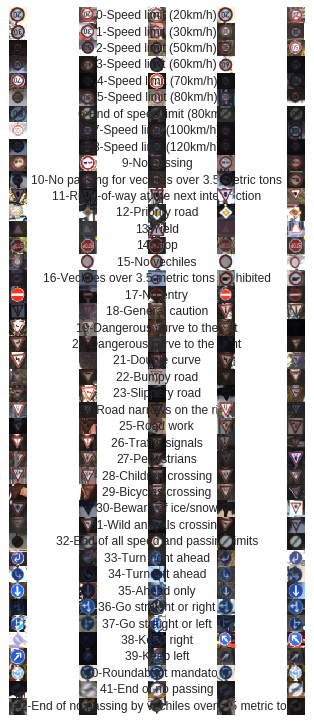

In [0]:
# Numunelerin sayısı
n_samples = []

# Gösterilmek istenen sütun
cols = 5
# Farklı resim sayısı (0 ... 42 = 43 tane)
n_classes = 43

# Bir örnekte birden fazla alan gösterme
fig, axs = plt.subplots(nrows=n_classes, ncols=cols, figsize=(5, 10))
# Plot'ların bitişik olmasını engelleme araya boşluk ekleme
fig.tight_layout()

# Tekrarlama yapısı
for i in range(cols):
    # İlk veri indeks, ikinci veri satır verileri. (ClassId, SignName vs.)
    for j, row in data.iterrows():
        # Her bir sayı için girilen inputları alma
        X_selected = X_train[Y_train == j]
        # Girilen inputları ekrana gri olarak çizgirme
        axs[j][i].imshow(X_selected[random.randint(0, len(X_selected) - 1), :, :], cmap=plt.get_cmap("gray"))
        # Koordinat sistemini kapatma
        axs[j][i].axis("off")
        
        # Ortadaki verileri örnek olarak alacağız
        if i == 2:
            # Çizimin üstüne başlık koyma (İndeks ve Tabela Adı)
            axs[j][i].set_title(str(j) +  "-" + row['SignName'])
            # Seçili olanların sayısını saklama
            n_samples.append(len(X_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0,0.5,'Number of images')

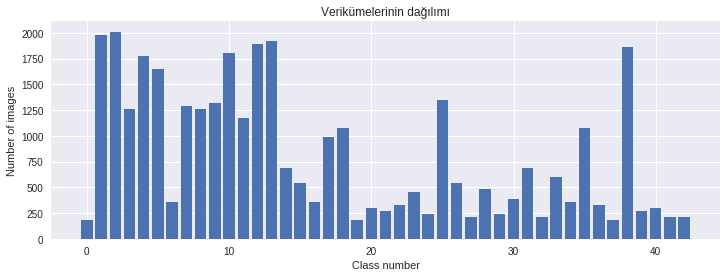

In [0]:
# Verilerin dağılımını gösterme
print(n_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), n_samples)
plt.title("Verikümelerinin dağılımı")
plt.xlabel("Class number")
plt.ylabel("Number of images")

x:  (32, 32, 3)  ->  36


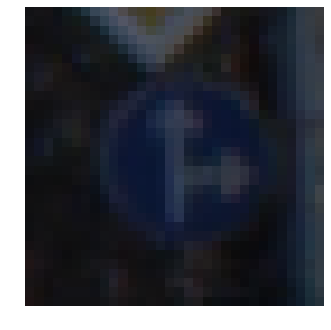

In [0]:
# OpenCV
import cv2

# Rastgele bir resmi gösterme
plt.imshow(X_train[1000])
plt.axis('off')
print("x: ", X_train[1000].shape, " -> ", Y_train[1000])

(32, 32)


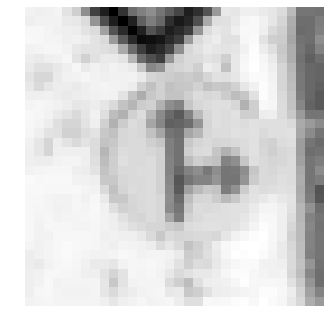

In [0]:
# Preprocessing Teknikleri
def grayscale(img):
  # Renkli resmi gri hale getirme
  return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# İşlemi test etme
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis('off')
print(img.shape)
  

(32, 32)


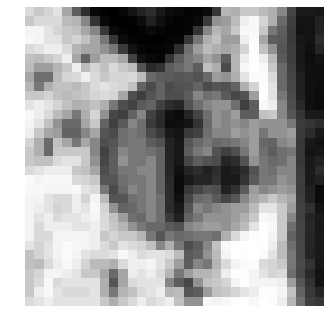

In [0]:
# Resmin parlaklık değerleri dengeleme. Makine öğrenimi daha da kolay hale getirir.
def equlize(img):
  # Sadece grayscale (gri) resmi kabul eder.
  return cv2.equalizeHist(img)

# İşlemi test etme
img = equlize(img)
plt.imshow(img)
plt.axis('off')
print(img.shape)

In [0]:
# Aldığımız verileri kullanmadan önce işleme (ön işleme)
def preprocessing(img):
  # Gri renge döönüştürme
  img = grayscale(img)
  # Parlık değerlerini dengeleme
  img = equlize(img)
  # Normalization işlemi (0-1 arasına alma)
  img = img / 255
  return img

# Verilerin herbirini ön işleme sokma
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))
  

(34799, 32, 32)


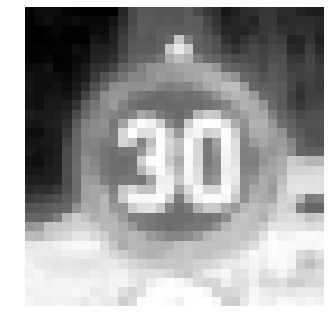

In [0]:
# Rastgele bir işlenmiş resmi gösterme
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

In [0]:
# Derinlik değeri ekliyoruz (gri olduğu içi 1)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Verileri gösterme
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


## Verileri çoğaltma işlemi (Data Augmentation)

Aynı resmin:

*   Döndürülmüş
*   Boyutu Değiştirilmiş

gibi farklı hallerini oluştururak, elimizdeki veri sayısını arttırma.

**Not:** Yeni resimleri bellekte tutmaz. Gerektiği zaman oluşturur, kullandıktan sonra temizler.

 - Bellek kullanımdan tasarruf sağlar
 - İşlem süresi uzun sürer.





In [0]:
from keras.preprocessing.image import ImageDataGenerator

# shift_range: Kaydırma oranı (0.1 = %10 kaydırma) 
# zoom_range: Büyütme oranı (0.2 = %20 büyütme)
# shear_range: Belli bir noktadan yukarı çekme. (Kare -> Yamuk)
# rotation_range: Döndüme mesafesi
data_generator = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    rotation_range=10
)

# Çoğaltılacak resimleri tanımlama
data_generator.fit(X_train)

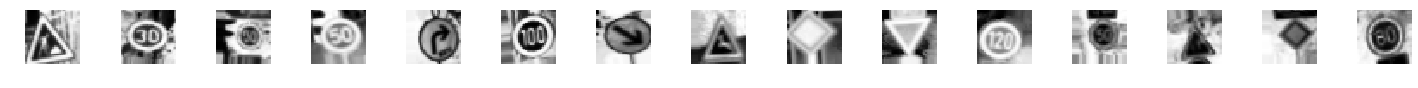

In [0]:
# Çoğaltılan resimlere erişmek için
batches = data_generator.flow(X_train,Y_train, batch_size=20)

X_batch, Y_batch = next(batches)


# Sütun sayısı
n_batch_col = 15

# Birden fazla çizim alanı oluşturma 
# Subplots(row, column, çizim alanı boyutu)
fig, axs = plt.subplots(1, n_batch_col, figsize=(20, 5))

# Çizimler arasına boşluk ekleme
fig.tight_layout()

for i in range(n_batch_col):
  # Resimleri yeniden boyutlandırma
  axs[i].imshow(X_batch[i].reshape(32, 32))
  # Eksen çizgilerini kaldırma
  axs[i].axis('off')
  

In [0]:
# One Encoded olan veriyi Hot Encodded yapma 
# 0-1 -> 00000...0001 (42 tane sıfır)
Y_train = to_categorical(Y_train, n_classes)
Y_val = to_categorical(Y_val, n_classes)
Y_test = to_categorical(Y_test, n_classes)

## Model Oluşturma

Eğer başarı **düşük** olursa sırasıyla


*   Adam(lr=) değeri  küçültülür. (Learning rate)
*   Conv2D( x , ...) 'x' sayısı arttırılır. (Filtre sayısı)
*   Conv2D sayısı arttırılır. (Filtre'ye ek filtreleme yapma)
*   Dropout Layer, filtre işlemleri sonuna eklenir. (Overfitting azaltma)





In [0]:
# Değiştirilmiş LeNet Modeli oluşturma
def modified_leNet_model():
  # Başarının düşük olma durumunda değişecek olan veriler numaralandırışmıştır.
  
  model = Sequential()
  # 2. Fİltre sayısı 30'dan 60'a çıkarıldı.
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  # 3. Alttaki satır kararlılığı arttırmak için eklendi
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(30, (3, 3), activation='relu'))
  # 3. Alttaki satır kararlılığı arttırmak için eklendi
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # 4. Overfitting'i engelleme adına eklendi
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes, activation='softmax'))
  # 1. Başarı düşük olursa lr'yi azalt.
  model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model;
            

In [0]:
# Modeli oluşturma ve gösterme
model = modified_leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 30)          0         
__________

In [0]:
# Modelin verilerini tanımlama
history = model.fit_generator(
    datagen.flow(
        X_train, 
        Y.train, 
        batch_size=50
    ),
    steps_per_epochs=2000,
        epochs=10,
        validation_data=(X_val, Y_val),
        shuffle=
)

# Data augmentation olmazsa (veri çoğaltma)
# history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val), batch_size=400, verbose=1, shuffle=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 10s 295us/step - loss: 2.3489 - acc: 0.3656 - val_loss: 0.6833 - val_acc: 0.8306
Epoch 2/10
34799/34799 [==============================] - 5s 139us/step - loss: 0.6605 - acc: 0.7950 - val_loss: 0.3092 - val_acc: 0.9134
Epoch 3/10
34799/34799 [==============================] - 5s 140us/step - loss: 0.3549 - acc: 0.8907 - val_loss: 0.1684 - val_acc: 0.9494
Epoch 4/10
34799/34799 [==============================] - 5s 140us/step - loss: 0.2524 - acc: 0.9222 - val_loss: 0.1451 - val_acc: 0.9583
Epoch 5/10
34799/34799 [==============================] - 5s 139us/step - loss: 0.2010 - acc: 0.9382 - val_loss: 0.1210 - val_acc: 0.9630
Epoch 6/10
34799/34799 [==============================] - 5s 140us/step - loss: 0.1685 - acc: 0.9464 - val_loss: 0.1254 - val_acc: 0.9621
Epoch 7/10
34799/34799 [==============================] - 5s 140us/step - loss: 0.1437 - acc: 0.9547 - val_loss: 0.0950 - 

Text(0.5,0,'Epochs (Devir)')

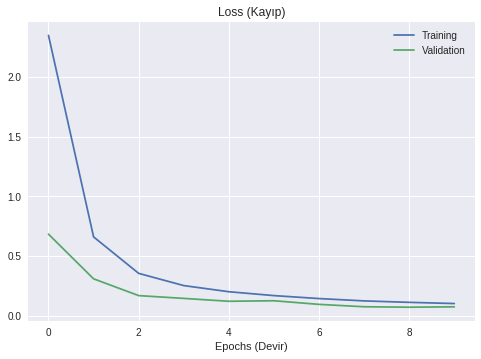

In [0]:
# Modelin çalışırkenki kaybını görselleştirme
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss (Kayıp)')
plt.xlabel('Epochs (Devir)')

### Modelin doğruluğunun zamana göre değişimini gösterme

Alttaki açıklamaların sağlanması gerekmekte.

*  *val_acc* her zaman *acc* çizgisinin üstünde olmalı.

*   2 çizginin kesişmesi durumunda **overfitting** olur. (*Overfit olmamalı*)



Text(0.5,0,'Epochs (Devir)')

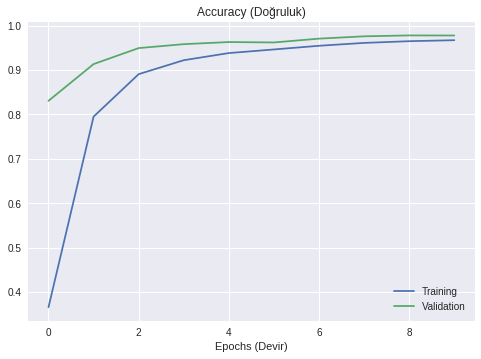

In [0]:
# Modelin çalışırkenki doğruluğunu görselleştirme
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy (Doğruluk)')
plt.xlabel('Epochs (Devir)')

In [0]:
# Skoru kaydetme ve yazdırma
score = model.evaluate(X_test, Y_test, verbose=1)

print("Test Skoru: ", score[0])
print("Test Doğruluğu: ", score[1])

12630/12630 [==============================] - 2s 123us/step
Test Skoru:  0.1608654095489688
Test Doğruluğu:  0.9531274742864939


## Test Aşaması

Farklı resimlerle test etme


### Url üzerinden resmi çekme ve işleme (fetch)

(-0.5, 1299.5, 955.5, -0.5)

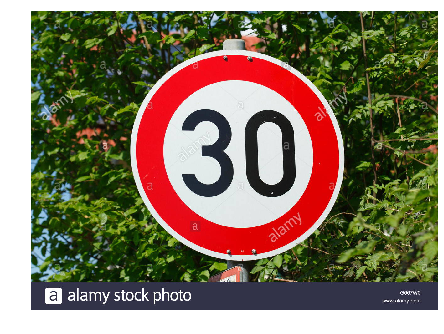

In [0]:
# URL'den veri alma işlemi
import requests
from PIL import Image

# Url'i tanımalama
# Linkler: (Hatalı olanlar: 2, 4, 5)
# 1. https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg
# 2. https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg
# 3. https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg
# 4. https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg
# 5. https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'

# URL isteğinden bulunup, sonucu alma
response = requests.get(url, stream=True)

# Resmi açıp değişkene atama
img = Image.open(response.raw)

# Resmi plota çizme
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis('off')

## Resmi ön işleme sokma

(32, 32)


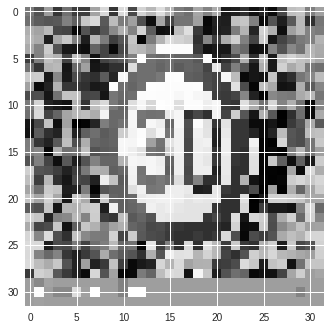

In [0]:
# Array'a dönüştürme
img = np.asarray(img)

# Resmi bizim resimlerimizle aynı boyuta getirme
img = cv2.resize(img, (32, 32))

# Ön işleme fonksiyonuna sokma
img = preprocessing(img)

# Resmi plota çizdirme
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

## Resme derinlik değeri ekleme


*   Gray Scale  -> 1
*   RGB -> 3



In [0]:
# Resmi boyutunu değiştirme
img = img.reshape(1, 32, 32, 1)

## Resmi test etme
Modelimiz üzerinde resmi test ediyoruz.

In [0]:
# Modelin öngörüsünü yazdırma
print("Öngörülen İşaret: "+ str(model.predict_classes(img)))

Öngörülen İşaret: [1]
